In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
data = pd.read_csv('../input/churn-modelling/Churn_Modelling.csv')

# Visualize the data

In [3]:
nRow, nCol = data.shape
print(f'Dataset has {nRow} columns & {nCol} rows')

Dataset has 10000 columns & 14 rows


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [7]:
data.describe().round(2).style.background_gradient()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.500000,15690940.570000,650.530000,38.920000,5.010000,76485.890000,1.530000,0.710000,0.520000,100090.240000,0.200000
std,2886.900000,71936.190000,96.650000,10.490000,2.890000,62397.410000,0.580000,0.460000,0.500000,57510.490000,0.400000
min,1.000000,15565701.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.750000,15628528.250000,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,5000.500000,15690738.000000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.920000,0.000000
75%,7500.250000,15753233.750000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.250000,0.000000
max,10000.000000,15815690.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


# Exploratory Data Analysis (EDA)

In [8]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:xlabel='Tenure', ylabel='Count'>

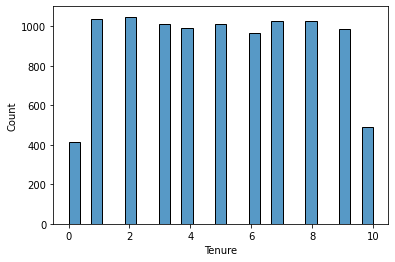

In [9]:
sns.histplot(data=data, x='Tenure')

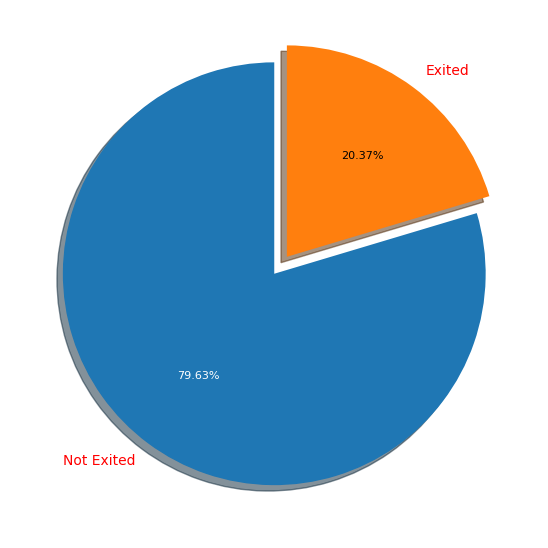

In [10]:
values = data.Exited.value_counts()
labels = ['Not Exited', 'Exited']

fig, ax = plt.subplots(figsize = (8, 7), dpi = 100)
explode = (0, 0.10)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'red')
plt.setp(autotexts, size = 8, color = 'white')
autotexts[1].set_color('black')
plt.show()

##### ☝ Comment:
                20% of the customers have churned and 80% haven't.

<AxesSubplot:xlabel='Gender', ylabel='count'>

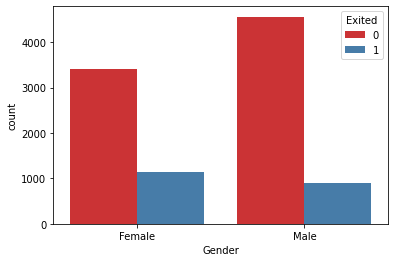

In [11]:
sns.countplot(data=data, x='Gender',hue='Exited',palette='Set1')

##### ☝ Comment:
                   The proportion of female customers churning is also greater than that of male customers.

<AxesSubplot:xlabel='Tenure', ylabel='count'>

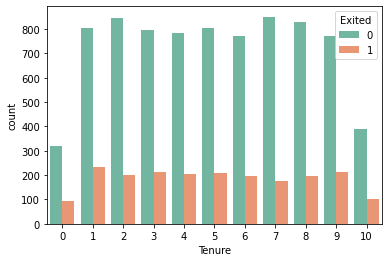

In [12]:
sns.countplot(x='Tenure', hue = 'Exited', data = data,palette='Set2')

##### ☝ Comment:
                    Majority of customers have tenure between 1 to 9 and churing rate is also high between these tenures.

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

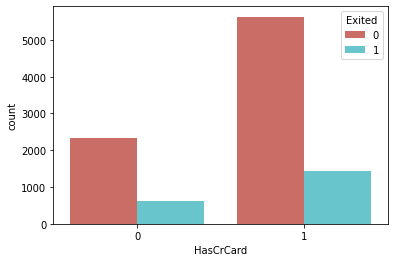

In [13]:
sns.countplot(x='HasCrCard', hue = 'Exited', data = data,palette='hls')

##### ☝ Comment:
                    majority of customers that churned are those with credit cards

In [14]:
continuous_var = ['CreditScore','Age','Balance','EstimatedSalary']

In [15]:
for i in continuous_var:
        boxp = px.box(data_frame=data,y=i,x='Exited')
        boxp.show()

##### ☝ Comments:
- There is no big difference in credit score distribution between customers which are churned or not.
- The older customers are churning more than younger ones.
- Bank is loosing customers with big bank balance.
- no big difference in Estimated Salary but bank is lossing custmers with bigesst average Estimated Salary.

<AxesSubplot:>

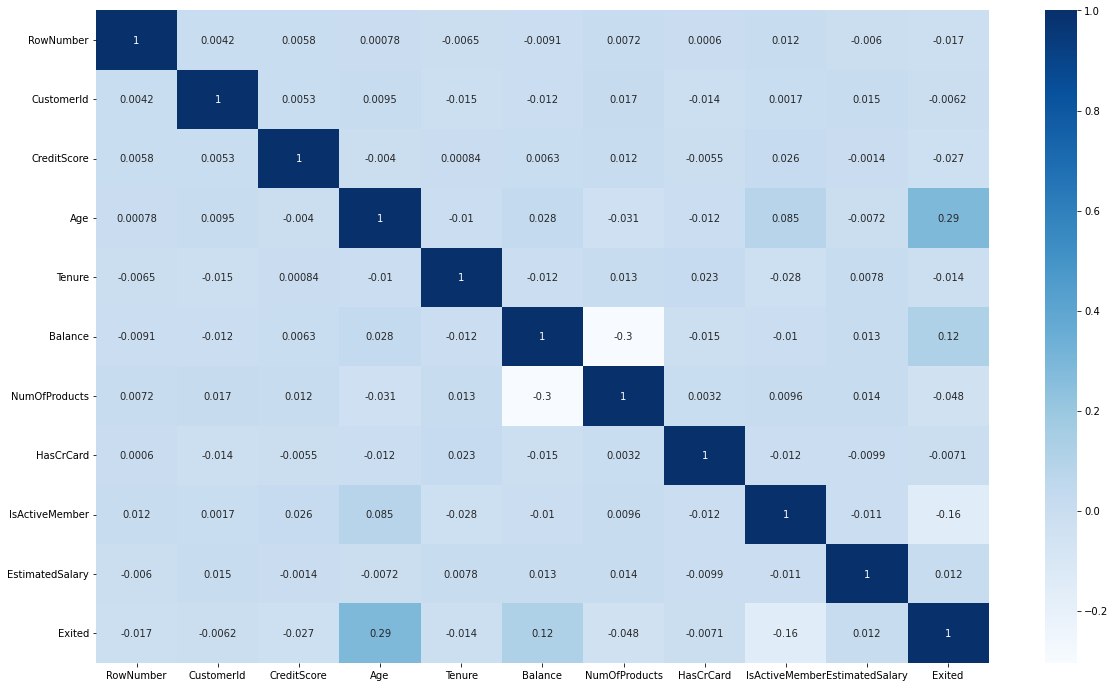

In [16]:
plt.figure(figsize = (20, 12))
sns.heatmap(data.corr(),cbar=True, annot=True, cmap='Blues')

##### ☝ Comment:
- There is no multicolinearity present in data.

In [17]:
data.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

### dropping useless columns 


In [18]:
data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
LE = LabelEncoder()

In [22]:
data['Geography'] = LE.fit_transform(data['Geography'])
data['Gender'] = LE.fit_transform(data['Gender'])

In [23]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [24]:
col_to_scale = ['CreditScore','Balance','EstimatedSalary','Age']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[col_to_scale]=scaler.fit_transform(data[col_to_scale])

In [25]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,0,0.324324,2,0.000000,1,1,1,0.506735,1
1,0.516,2,0,0.310811,1,0.334031,1,0,1,0.562709,0
2,0.304,0,0,0.324324,8,0.636357,3,1,0,0.569654,1
3,0.698,0,0,0.283784,1,0.000000,2,0,0,0.469120,0
4,1.000,2,0,0.337838,2,0.500246,1,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,1,0.283784,5,0.000000,2,1,0,0.481341,0
9996,0.332,0,1,0.229730,10,0.228657,1,1,1,0.508490,0
9997,0.718,0,0,0.243243,7,0.000000,1,0,1,0.210390,1
9998,0.844,1,1,0.324324,3,0.299226,2,1,0,0.464429,1


# Split The Data

In [26]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train , y_test = train_test_split(X, y, test_size=0.25 , random_state=42)

# Scale The Data

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Modling

## Building ANN

In [31]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [32]:
model = Sequential()

2022-10-18 12:52:09.649193: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [33]:
# The first input layer
model.add(Dense(9, kernel_initializer = 'normal', activation = 'relu', input_shape = (10, )))

# adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

# The hidden layer

model.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))

model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())



# The output layer
model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))

# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the model to the training set 

model_history = model.fit(x_train, y_train, validation_split = 0.25, validation_data = (x_test, y_test), epochs = 150)

2022-10-18 12:52:09.923221: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150
176/176 [==============================] - 2s 4ms/step - loss: 0.6210 - accuracy: 0.7177 - val_loss: 0.5853 - val_accuracy: 0.7936
Epoch 2/150
176/176 [==============================] - 0s 3ms/step - loss: 0.5028 - accuracy: 0.7826 - val_loss: 0.4681 - val_accuracy: 0.7941
Epoch 3/150
176/176 [==============================] - 0s 3ms/step - loss: 0.4198 - accuracy: 0.8268 - val_loss: 0.4076 - val_accuracy: 0.8299
Epoch 4/150
176/176 [==============================] - 0s 3ms/step - loss: 0.3932 - accuracy: 0.8364 - val_loss: 0.3818 - val_accuracy: 0.8453
Epoch 5/150
176/176 [==============================] - 0s 3ms/step - loss: 0.3873 - accuracy: 0.8356 - val_loss: 0.3705 - val_accuracy: 0.8544
Epoch 6/150
176/176 [==============================] - 1s 4ms/step - loss: 0.3854 - accuracy: 0.8386 - val_loss: 0.3664 - val_accuracy: 0.8459
Epoch 7/150
176/176 [==============================] - 1s 4ms/step - loss: 0.3798 - accuracy: 0.8425 - val_loss: 0.3686 - val_accuracy: 0.8539

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 99        
_________________________________________________________________
dropout (Dropout)            (None, 9)                 0         
_________________________________________________________________
batch_normalization (BatchNo (None, 9)                 36        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 70        
_________________________________________________________________
dropout_1 (Dropout)          (None, 7)                 0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7)                 28        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8

In [35]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

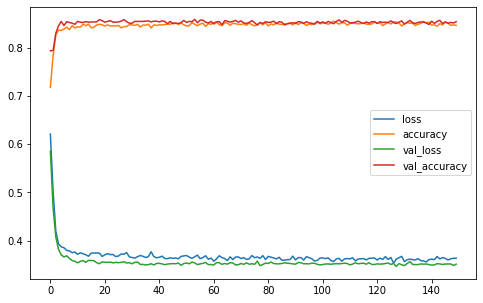

In [36]:
model_loss.plot (figsize = (8,5))


# Model Evaluation

In [37]:
acc = model.evaluate(x_test,y_test)[1]
print(f'Accuracy of model is {acc}')

79/79 [==============================] - 0s 2ms/step - loss: 0.3414 - accuracy: 0.8640
Accuracy of model is 0.8640000224113464


In [38]:
y_predicted =model.predict(x_test)
y_predicted = [1 if y>=0.5 else 0 for y in y_predicted] 
df = pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predicted})
df.head(15)

,Y_test,Y_predicted
6252,0,0
4684,0,0
1731,0,0
4742,0,0
4521,0,0
6340,0,0
576,0,0
5202,1,0
6363,0,0
439,0,0


In [39]:
from sklearn.metrics import classification_report , confusion_matrix


In [40]:
print(classification_report(y_predicted,y_test))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      2251
           1       0.41      0.82      0.54       249

    accuracy                           0.86      2500
   macro avg       0.69      0.84      0.73      2500
weighted avg       0.92      0.86      0.88      2500



Text(69.0, 0.5, 'Actual')

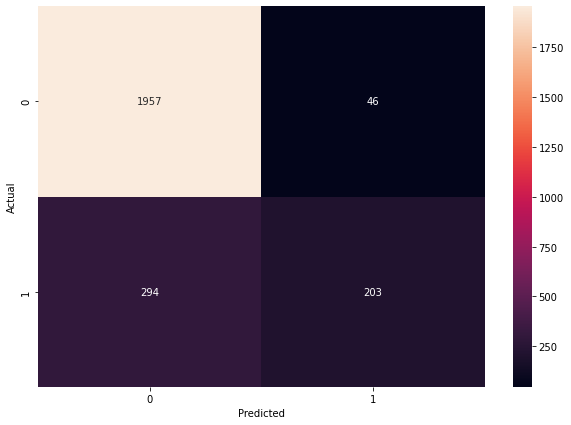

In [41]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# THANK YOU


### Feel free to ask me anything in the comments